### Supplementary Exercises for Week 2 Day  Notebook b

#### Run the following cell before doing the exercises.

In [1]:
# Run this function
def check(result, expected):
    if expected != result:
        print(
            f"Function should return the value {expected}, it is returning the value {result}.")
    else:
        print(f"Congratulations, the test case passed!")

In [2]:
from simpleimage import SimpleImage

## Q1

We've seen in class how we can use filters to transform real and interesting images. In this exercise we are going to write more of our own fun filters.

To start, let's load up a simple image from class

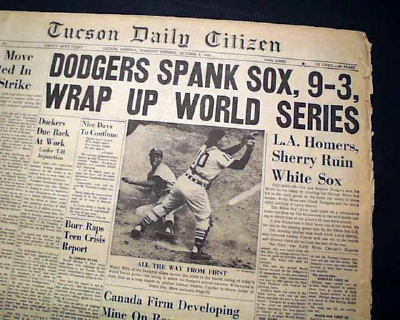

In [3]:
einstein = SimpleImage("images/magazine.png")
einstein.show(400)

### Q1.1

Let's convert the colors in this image to sepia. Sepia is a reddish-brown color like that of old photographs. Here is an example:

|Normal|Sepia|
|:--|:--|
|![rainbow.jpeg](images/magazine.png)|![rainbow_gray](images/magazine_sepia.png)|

Here we will be inverting each color individually, we will use this formula to convert the color each pixel.

```
pixel = image.get_rgb(x, y)
old_red = pixel[0]  # This is the current value for red in this pixel
old_green = pixel[1] # This is the current value for green in  this pixel
old_blue = pixel[2] # This is the current value of blue in this pixel
new_red: (old_red * .393) + (old_green *.769) + (old_blue * .189)  
new_green: (old_red * .349) + (old_green *.686) + (old_blue * .168)
new_blue: (old_red * .272) + (old_green *.534) + (old_blue * .131)

image.set_rgb(x, y, new_red, new_green, new_blue)
    # Work out how to get new_green and new_blue yourself!
```


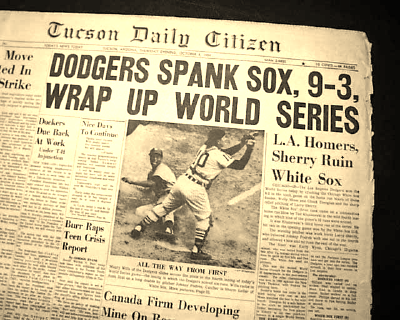

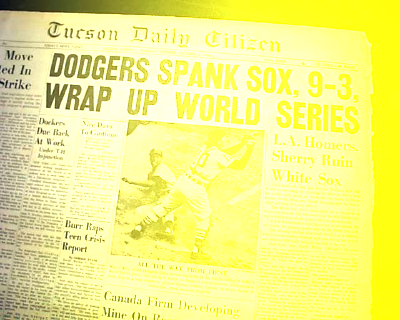

In [8]:
def apply_sepia(image):
    width = image.width
    height = image.height
    new_image = SimpleImage.blank(width, height)
    for x in range(width):
        for y in range(height):
            
            pixel = image.get_rgb(x, y)
            old_red = pixel[0]
            old_green = pixel[1]
            old_blue = pixel[2]
            
            # TODO: WRITE YOUR CODE HERE
            new_red = int((old_red * .393) + (old_green *.769) + (old_blue * .189))
            new_green = int((old_red * .349) + (old_green *.686) + (old_blue * .168))
            new_blue = int((old_red * .272) + (old_green *.534) + (old_blue * .131))
            new_image.set_rgb(x, y, new_red, new_green, new_blue)
    return new_image

apply_sepia(einstein).show(400)


# # For reference, here's the red_gradient_filter from the lecture
def red_gradient_filter(image):
    width = image.width
    height = image.height
    new_image = SimpleImage.blank(width, height)
    for x in range(width):
        for y in range(height):
            pixel = image.get_rgb(x, y)
            # You want to change the next 3 lines -->
            red = min(255, pixel[0] + x)
            green = min(255, pixel[1] + x)
            blue = pixel[2]
            new_image.set_rgb(x, y, red, green, blue)
    return new_image

red_gradient_filter(einstein).show(400)


## Q2: Applying a Blur Filter on Images


### 2.1
The goal of this exercise is to apply a **blur** filter to an image to make it appear smoother and less sharp. Here is an example.

|Normal|Sepia|
|:--|:--|
|![nature_image.jpg](images/nature_image.png)|![nature_image_blur](images/nature_image_blur.png)|


In order to solve this problem. Use an averaging the RGB (Red, Green, Blue) values of each pixel with its surrounding pixels, including diagonals.
- Each pixel should take each of its neighbors (including diagonals) and itself. It will then average out each R, G and B values independently (always averaging down)

![blur_matrix.jpg](images/blur_matrix.png)

#### The Blurring Process
- For each pixel in the image:
- Identify the pixel's surrounding pixels, including diagonals.
- Compute the average RGB values by adding up the RGB components of all the pixels and dividing by the number of pixels considered.
- Replace the current pixel's RGB values with the newly computed average values.

#### Handling Boundary Cases

As we apply the blur filter, we must be cautious not to go beyond the image boundaries. Some pixels near the edges won't have all the neighboring pixels. 

![neighbors.png](images/neighbors.png)

To avoid errors, we'll create a function that checks if a given pixel is within the image boundaries.

#### Implementing the Blur Function

To implement the blur function, we follow these steps:

- Create a function is_inbound(i, j, rows, cols) that checks if a pixel at row i and column j is within the rows and cols boundaries of the image.
- Now, iterate through each pixel in the image.
- For each pixel, gather the RGB values of its neighboring pixels that are within the image boundaries, then calculate the average RGB values independently (average down) to get the new color for the current pixel.
- Update the current pixel's color with the newly computed color.

In [ ]:
# Step 1: Create a function is_inbound(i, j, rows, cols) that checks if a pixel 
#         at row i and column j is within the rows and cols boundaries of the image.

def check_borders(x, y, width, height):
    # TODO: WRITE YOUR CODE HERE

check(check_borders(0, 0, 2, 3), True)
check(check_borders(4, 0, 2, 3), False)

In [ ]:
 def apply_blur(image):
    width = image.width
    height = image.height
    new_image = SimpleImage.blank(width, height)
    
    # Step 2: Now, iterate through each pixel in the image.
    for x in range(width):
        for y in range(height):
            
            # Step 3: For each pixel, gather the RGB values of its neighboring pixels that are within the image boundaries.
            #         then calculate the average RGB values independently (average down) to get the new color for the current pixel.
            
            # TODE: WRITE YOUR CODE HERE
            
            new_red = ???
            new_green = ???
            new_blue = ???
            
            # Step 4: Update the current pixel's color with the newly computed color.
            new_image.set_rgb(x, y, new_red, new_green, new_blue)
    return new_image

nature_image = SimpleImage("images/nature.jpg")
apply_blur(nature_image).show(500)

### 2.2  
#### Applying stronger blur effects

To make the image more blurred, you can apply the blurring process multiple times. Each iteration will further average out the RGB values of the pixels, leading to a stronger blurring effect. The more iterations you apply, the smoother and more blurred the image will become.

In [ ]:
 def apply_blur_multiple(image, iterations):
    width = image.width
    height = image.height
    new_image = SimpleImage.blank(width, height)
    
    # Repeat the above code that applies the blur effect multiple time here
    # TODO: WRITE YOUR CODE HERE
    
    return new_image

nature_image = SimpleImage("images/nature.jpg")
apply_blur_multiple(nature_image, 3).show(500)

### 2.3
#### Applying the blur on selected part of the image

To apply the blur effect only to a selected part of the image, you'll need to modify the `apply_blur_multiple` function to specify the region you want to blur. One way to achieve this is by passing the coordinates of the selected region as input parameters to the function.

we will introduce a new function `blur_selected_region`, which takes the original image, the number of iterations to apply the blur effect, the coordinates of the top-left corner of the selected region, the coordinates of the bottom-right corner of the selected region.

In [ ]:
 def apply_blur_multiple_with_selected_area(image, iterations, top_left, bottom_right):
    width = image.width
    height = image.height
    
    tl_i, tl_j = top_left
    br_i, br_j = bottom_right
    
    new_image = SimpleImage.blank(width, height)
    
    # TODO: WRITE YOUR CODE HERE
    
    return new_image

nature_image = SimpleImage("images/nature.jpg")
width = nature_image.width
height = nature_image.height
top_left = (width // 8, height // 8)
bottom_right = ((3 * width) // 4, (3 * height) // 4)
apply_blur_multiple_with_selected_area(nature_image, 3, top_left, bottom_right).show(500)